# 回帰分析について真剣に考える。
- データ揃えて、ヤー！っと分析していたけど、データの分布とか確かめつつ、根拠を持って回帰モデルを作れればと思っています。時間かかるぞこりゃ。
- 統計モデリングの第一歩は、「ばらつきのあるデータは、何か確率分布から発生したと考えれば扱いやすいな」と考えることだそうです。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/home/kyohei/kaggle_data/02digit_recognizer/train.csv')

- 被説明変数は0〜9の手書き文字
- 説明変数は各pixelでの色の濃さ（0〜255）

意味なさげだけど、とりあえずlabelの統計量と、ヒストグラムを作成

In [8]:
#統計量
data.iloc[:,0].describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

今回の場合、ラベルの統計量って多分意味ないね。

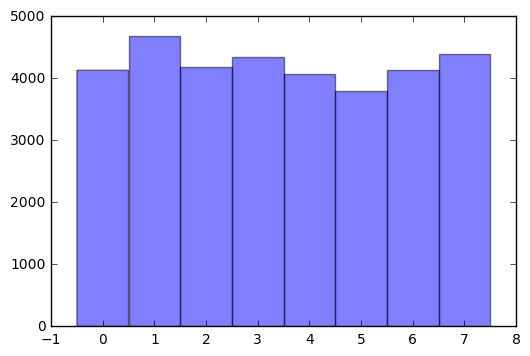

In [17]:
plt.hist(data.iloc[:,0],alpha=0.5,bins=np.arange(-0.5,8.5,1))
#plt.ylim([])
plt.show()

- 関心があるのは、各pixcelが特定の値を持った時にラベルがある特定の数字になる確率。
- 例）pixel1が255で、その他のpixelがすべて0の時ラベルが1になる確率
- 特徴量がいっぱいあると頭が溶けそうになるので、とりあえずpixel210とpixel260で考えます。そんで、最後に特徴量増やします。

In [56]:
X = data[['pixel210','pixel260']]
y = data[['label']]

In [57]:
#説明変数の統計量
X.describe()

,pixel210,pixel260
count,42000.000000,42000.000000
mean,133.590810,55.555333
std,110.569713,94.164568
min,0.000000,0.000000
25%,0.000000,0.000000
50%,152.000000,0.000000
75%,253.000000,79.000000
max,255.000000,255.000000


- 説明変数と被説明変数の関係